In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Python_Dersleri/master/1.fonksiyonlar/data/flight.csv')
df = df.drop(['tailnum','dep_time','sched_dep_time'],axis=1)
print('Data Types:')
print(df.dtypes.value_counts())
print()
print(df.info())
df.head()

Data Types:
object     4
float64    3
int64      3
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 10 columns):
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
origin            336776 non-null object
dest              336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 25.7+ MB
None


,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour
0,2.0,830.0,819,11.0,UA,1545,EWR,IAH,1400,2013-01-01 05:00:00
1,4.0,850.0,830,20.0,UA,1714,LGA,IAH,1416,2013-01-01 05:00:00
2,2.0,923.0,850,33.0,AA,1141,JFK,MIA,1089,2013-01-01 05:00:00
3,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,1576,2013-01-01 05:00:00
4,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,762,2013-01-01 06:00:00


,Missing Records,Percentage (%)
dep_delay,8255,2.451184
arr_time,8713,2.587180
sched_arr_time,0,0.000000
arr_delay,9430,2.800081
carrier,0,0.000000
flight,0,0.000000
origin,0,0.000000
dest,0,0.000000
distance,0,0.000000
time_hour,0,0.000000


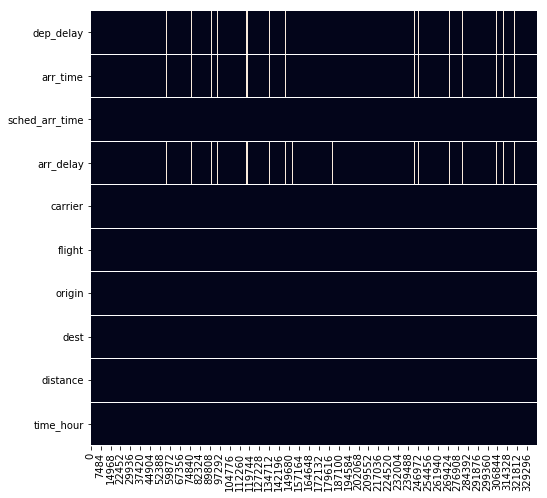

In [3]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [4]:
cols = ['arr_time', 'arr_delay']
df[cols] = df[cols].fillna(df[cols].median())
df['distance(miles)'] = round(df.distance.apply(lambda x: x*0.62137),2)
df.head()

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles)
0,2.0,830.0,819,11.0,UA,1545,EWR,IAH,1400,2013-01-01 05:00:00,869.92
1,4.0,850.0,830,20.0,UA,1714,LGA,IAH,1416,2013-01-01 05:00:00,879.86
2,2.0,923.0,850,33.0,AA,1141,JFK,MIA,1089,2013-01-01 05:00:00,676.67
3,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,1576,2013-01-01 05:00:00,979.28
4,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,762,2013-01-01 06:00:00,473.48


In [5]:
mylist1 = np.unique(df.dest.values)
sub = 'i'
print ("\n".join(s for s in mylist1 if sub.lower() in s.lower()))
print()
mylist2 = [idx for idx, val in enumerate(mylist1) if sub.lower() in val.lower()]
print('Index')
print(mylist2)
mylist3 = [val for idx, val in enumerate(mylist1) if sub.lower() in val.lower()]
print()
print('Values')
print(mylist3)

BWI
IAD
IAH
ILM
IND
MCI
MIA
PBI
PIT
RIC

Index
[16, 42, 43, 44, 45, 53, 58, 71, 75, 81]

Values
['BWI', 'IAD', 'IAH', 'ILM', 'IND', 'MCI', 'MIA', 'PBI', 'PIT', 'RIC']


In [6]:
mylist1= np.unique([str(i) for i in df.flight.values])
sub = '151'
print ("\n".join(s for s in mylist1 if sub in s))
print()
mylist2 = [idx for idx, val in enumerate(mylist1) if sub in val]
print('Index')
print(mylist2)
mylist3 = [val for idx, val in enumerate(mylist1) if sub in val]
print()
print('Values')
print(mylist3)

1151
151
1510
1511
1512
1514
1515
1516
1517
1518
1519
2151
4151

Index
[163, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 1050, 2252]

Values
['1151', '151', '1510', '1511', '1512', '1514', '1515', '1516', '1517', '1518', '1519', '2151', '4151']


In [7]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['date'] = df['time_hour'].map(lambda x: x.strftime('%Y-%m-%d'))
df['month'] = df['time_hour'].dt.month
df.head()

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month
0,2.0,830.0,819,11.0,UA,1545,EWR,IAH,1400,2013-01-01 05:00:00,869.92,2013-01-01,1
1,4.0,850.0,830,20.0,UA,1714,LGA,IAH,1416,2013-01-01 05:00:00,879.86,2013-01-01,1
2,2.0,923.0,850,33.0,AA,1141,JFK,MIA,1089,2013-01-01 05:00:00,676.67,2013-01-01,1
3,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,1576,2013-01-01 05:00:00,979.28,2013-01-01,1
4,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,762,2013-01-01 06:00:00,473.48,2013-01-01,1


In [8]:
pd.crosstab(df['origin'], df['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
origin,,,,,,,,,,,,
EWR,9893,9107,10420,10531,10592,10175,10475,10359,9550,10104,9707,9922
JFK,9161,8421,9697,9218,9397,9472,10023,9983,8908,9143,8710,9146
LGA,7950,7423,8717,8581,8807,8596,8927,8985,9116,9642,8851,9067


In [9]:
pd.pivot_table(df, values='arr_delay', index=['origin'],
                  columns=['month'], aggfunc=np.mean)

month,1,2,3,4,5,6,7,8,9,10,11,12
origin,,,,,,,,,,,,
EWR,12.317699,7.970462,9.994434,13.598044,5.098659,15.920295,14.778520,6.469254,-4.735288,2.530978,0.611723,18.368273
JFK,1.278026,3.929343,2.424461,6.744413,2.026711,16.905089,19.521700,5.787338,-4.470251,-3.593241,-0.903674,12.246556
LGA,3.172579,2.714940,3.410692,11.520336,2.573294,13.759656,13.070684,5.126322,-2.886463,0.118648,1.456446,11.245726


In [10]:
df['origin'].replace({'EWR':'ewr', 'JFK':'jfk', 'LGA':'lga'}, inplace=True)
df.loc[df.origin=='ewr', ['dest']] ='BAY'
df['flight'] = df['flight'].astype('float')
df.head()

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month
0,2.0,830.0,819,11.0,UA,1545.0,ewr,BAY,1400,2013-01-01 05:00:00,869.92,2013-01-01,1
1,4.0,850.0,830,20.0,UA,1714.0,lga,IAH,1416,2013-01-01 05:00:00,879.86,2013-01-01,1
2,2.0,923.0,850,33.0,AA,1141.0,jfk,MIA,1089,2013-01-01 05:00:00,676.67,2013-01-01,1
3,-1.0,1004.0,1022,-18.0,B6,725.0,jfk,BQN,1576,2013-01-01 05:00:00,979.28,2013-01-01,1
4,-6.0,812.0,837,-25.0,DL,461.0,lga,ATL,762,2013-01-01 06:00:00,473.48,2013-01-01,1


In [11]:
print(df.groupby('origin')['dest'].nunique().to_frame())
df['sum_arr_delay'] = df.groupby('carrier')['arr_delay'].transform(pd.Series.cumsum)
df[df.carrier=='UA'].head(10)

        dest
origin      
ewr        1
jfk       70
lga       68


,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month,sum_arr_delay
0,2.0,830.0,819,11.0,UA,1545.0,ewr,BAY,1400,2013-01-01 05:00:00,869.92,2013-01-01,1,11.0
1,4.0,850.0,830,20.0,UA,1714.0,lga,IAH,1416,2013-01-01 05:00:00,879.86,2013-01-01,1,31.0
5,-4.0,740.0,728,12.0,UA,1696.0,ewr,BAY,719,2013-01-01 05:00:00,446.77,2013-01-01,1,43.0
12,-2.0,924.0,917,7.0,UA,194.0,jfk,LAX,2475,2013-01-01 06:00:00,1537.89,2013-01-01,1,50.0
13,-2.0,923.0,937,-14.0,UA,1124.0,ewr,BAY,2565,2013-01-01 06:00:00,1593.81,2013-01-01,1,36.0
16,-1.0,854.0,902,-8.0,UA,1187.0,ewr,BAY,2227,2013-01-01 06:00:00,1383.79,2013-01-01,1,28.0
24,0.0,858.0,915,-17.0,UA,1077.0,ewr,BAY,1085,2013-01-01 06:00:00,674.19,2013-01-01,1,11.0
26,11.0,945.0,931,14.0,UA,303.0,jfk,SFO,2586,2013-01-01 06:00:00,1606.86,2013-01-01,1,25.0
32,-4.0,933.0,932,1.0,UA,496.0,lga,IAH,1416,2013-01-01 06:00:00,879.86,2013-01-01,1,26.0
37,-2.0,1016.0,947,29.0,UA,1665.0,ewr,BAY,2454,2013-01-01 06:00:00,1524.84,2013-01-01,1,55.0


In [12]:
df = df.drop('sum_arr_delay', axis = 1)
df = df.iloc[50:]
df.head()

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month
50,1.0,1023.0,1030,-7.0,UA,1496.0,ewr,BAY,2434,2013-01-01 06:00:00,1512.41,2013-01-01,1
51,-4.0,936.0,942,-6.0,B6,203.0,jfk,LAS,2248,2013-01-01 06:00:00,1396.84,2013-01-01,1
52,-3.0,932.0,921,11.0,B6,117.0,jfk,MSY,1182,2013-01-01 06:00:00,734.46,2013-01-01,1
53,-7.0,936.0,1009,-33.0,DL,1383.0,lga,PBI,1035,2013-01-01 07:00:00,643.12,2013-01-01,1
54,0.0,1021.0,1030,-9.0,DL,1415.0,jfk,SLC,1990,2013-01-01 06:00:00,1236.53,2013-01-01,1


In [13]:
df['delay_total'] = df['dep_delay'] + df['arr_delay']
df = df.append(df.iloc[:6])
df.tail(6)

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month,delay_total
50,1.0,1023.0,1030,-7.0,UA,1496.0,ewr,BAY,2434,2013-01-01 06:00:00,1512.41,2013-01-01,1,-6.0
51,-4.0,936.0,942,-6.0,B6,203.0,jfk,LAS,2248,2013-01-01 06:00:00,1396.84,2013-01-01,1,-10.0
52,-3.0,932.0,921,11.0,B6,117.0,jfk,MSY,1182,2013-01-01 06:00:00,734.46,2013-01-01,1,8.0
53,-7.0,936.0,1009,-33.0,DL,1383.0,lga,PBI,1035,2013-01-01 07:00:00,643.12,2013-01-01,1,-40.0
54,0.0,1021.0,1030,-9.0,DL,1415.0,jfk,SLC,1990,2013-01-01 06:00:00,1236.53,2013-01-01,1,-9.0
55,-5.0,1037.0,1045,-8.0,DL,1865.0,jfk,SFO,2586,2013-01-01 07:00:00,1606.86,2013-01-01,1,-13.0


In [14]:
pd.concat([df[df['distance']>2000], df[df.arr_delay<10]],axis =0,ignore_index =True).head(6) 

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month,delay_total
0,1.0,1023.0,1030,-7.0,UA,1496.0,ewr,BAY,2434,2013-01-01 06:00:00,1512.41,2013-01-01,1,-6.0
1,-4.0,936.0,942,-6.0,B6,203.0,jfk,LAS,2248,2013-01-01 06:00:00,1396.84,2013-01-01,1,-10.0
2,-5.0,1037.0,1045,-8.0,DL,1865.0,jfk,SFO,2586,2013-01-01 07:00:00,1606.86,2013-01-01,1,-13.0
3,-2.0,1027.0,1025,2.0,VX,399.0,jfk,LAX,2475,2013-01-01 07:00:00,1537.89,2013-01-01,1,0.0
4,2.0,1058.0,1014,44.0,B6,671.0,jfk,LAX,2475,2013-01-01 07:00:00,1537.89,2013-01-01,1,46.0
5,-1.0,1020.0,1030,-10.0,AS,11.0,ewr,BAY,2402,2013-01-01 07:00:00,1492.53,2013-01-01,1,-11.0


In [15]:
pd.concat([df.dep_delay, df.arr_delay],axis =1).head(6)

,dep_delay,arr_delay
50,1.0,-7.0
51,-4.0,-6.0
52,-3.0,11.0
53,-7.0,-33.0
54,0.0,-9.0
55,-5.0,-8.0


In [16]:
df[(df.arr_delay >50) & (df.arr_delay<100) & ((df.flight == 1545) | (df.flight == 1141))].head(6)

,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,distance,time_hour,distance(miles),date,month,delay_total
10522,104.0,1025.0,850,95.0,AA,1141.0,jfk,MIA,1089,2013-01-13 05:00:00,676.67,2013-01-13,1,199.0
33411,115.0,16.0,2252,84.0,UA,1545.0,ewr,BAY,1400,2013-10-07 20:00:00,869.92,2013-10-07,10,199.0
142802,12.0,950.0,850,60.0,AA,1141.0,jfk,MIA,1089,2013-03-08 05:00:00,676.67,2013-03-08,3,72.0
182061,96.0,2205.0,2100,65.0,WN,1545.0,ewr,BAY,1167,2013-04-18 18:00:00,725.14,2013-04-18,4,161.0
186694,83.0,2151.0,2100,51.0,WN,1545.0,ewr,BAY,1167,2013-04-23 18:00:00,725.14,2013-04-23,4,134.0
207248,77.0,2156.0,2100,56.0,WN,1545.0,ewr,BAY,1167,2013-05-15 18:00:00,725.14,2013-05-15,5,133.0


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')